# Business case

This case requires to develop a customer segmentation to define marketing strategy. The
Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.


# Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=12,8
import warnings
warnings.filterwarnings('ignore')

In [2]:
cc=pd.read_csv('CC GENERAL.csv')

In [3]:
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# EDA and Data preprocessing

In [4]:
cc.shape

(8950, 18)

There are 18 columns and approximately 9,000 observations in the dataset

In [5]:
cc.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [6]:
cc['CUST_ID'].nunique()

8950

The dataset contains only continuous features with a column containing unique identifiers. No categorical column is present

In [7]:
cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There are 313 missing values in minimum payments column and a single value in CREDIT_LIMIT 

Handling missing values

In [9]:
round(cc['CREDIT_LIMIT'].mean(),2)

4494.45

In [10]:
cc['CREDIT_LIMIT'].fillna(cc['CREDIT_LIMIT'].mean(),inplace=True)

In [11]:
cc['MINIMUM_PAYMENTS'].fillna(cc['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [12]:
cc.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

The missing values have been handled by imputing the mean of each column.

Outliers

In [13]:
cc.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [14]:
data1=['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']
data2=['CASH_ADVANCE','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']
data3=['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

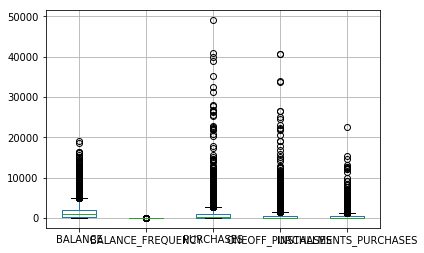

In [15]:
cc[data1].boxplot()

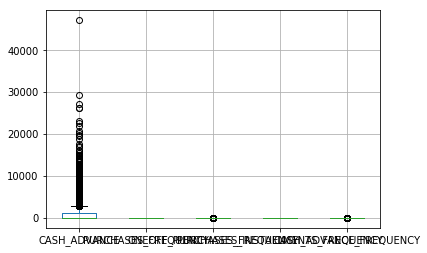

In [16]:
cc[data2].boxplot()

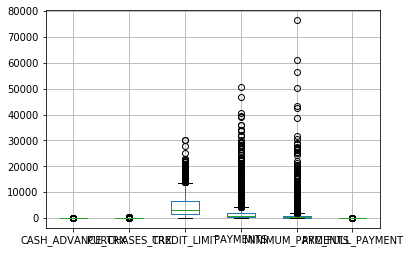

In [17]:
cc[data3].boxplot()

There are a number of outliers in our dataset.

Correlation

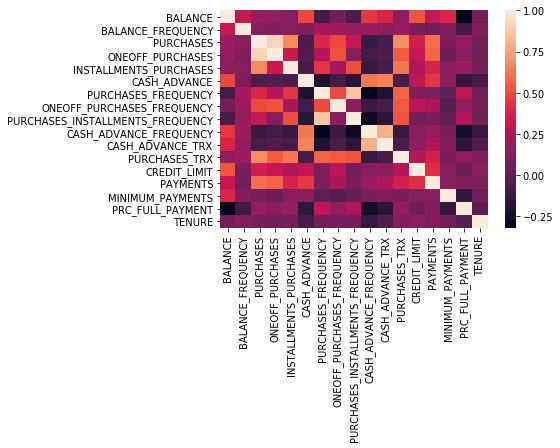

In [18]:
sns.heatmap(cc.corr())

Let's investigate the correlation between balance and the rest of the columns

In [19]:
Num=cc.select_dtypes(np.number)

In [20]:
corr=Num.corr()

In [21]:
corr['BALANCE'].sort_values(ascending=False)

BALANCE                             1.000000
CREDIT_LIMIT                        0.531267
CASH_ADVANCE                        0.496692
CASH_ADVANCE_FREQUENCY              0.449218
MINIMUM_PAYMENTS                    0.394282
CASH_ADVANCE_TRX                    0.385152
PAYMENTS                            0.322802
BALANCE_FREQUENCY                   0.322412
PURCHASES                           0.181261
ONEOFF_PURCHASES                    0.164350
PURCHASES_TRX                       0.154338
INSTALLMENTS_PURCHASES              0.126469
ONEOFF_PURCHASES_FREQUENCY          0.073166
TENURE                              0.072692
PURCHASES_INSTALLMENTS_FREQUENCY   -0.063186
PURCHASES_FREQUENCY                -0.077944
PRC_FULL_PAYMENT                   -0.318959
Name: BALANCE, dtype: float64

# Graphs and Charts

In [22]:
cc.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Balance

This is the amount left in their account to make purchases. Let's check the distribution of customer's balance in the dataset

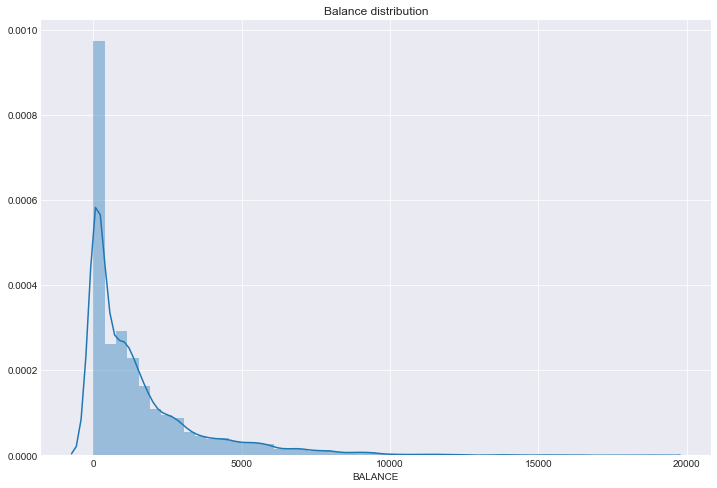

In [27]:
sns.distplot(cc['BALANCE'])
plt.title('Balance distribution')
plt.show()
sns.set_style('darkgrid')

Majority of customers have a balance between zero and 5,000. Some customers have balance of almost 20,000.

Balance frequency

This is how frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated.

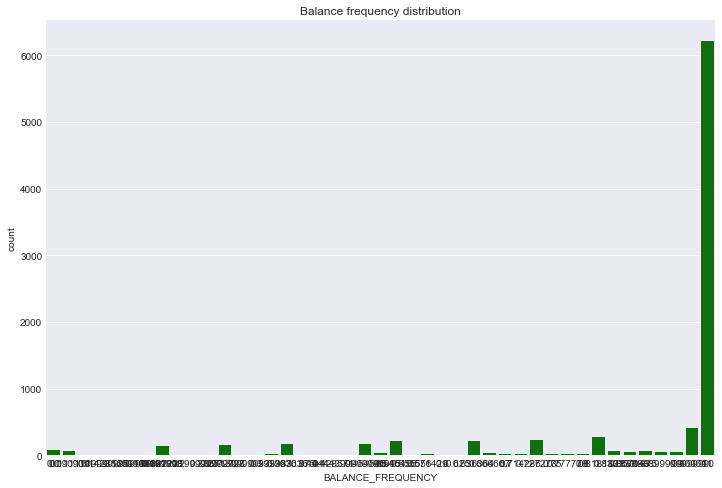

In [26]:
sns.countplot(cc['BALANCE_FREQUENCY'], color='green')
plt.title('Balance frequency distribution')
plt.show()
plt.rcParams['figure.figsize']=12,8

Over 60% of the customers update their account frequently

Tenure

This is the tenure of credit card service for user

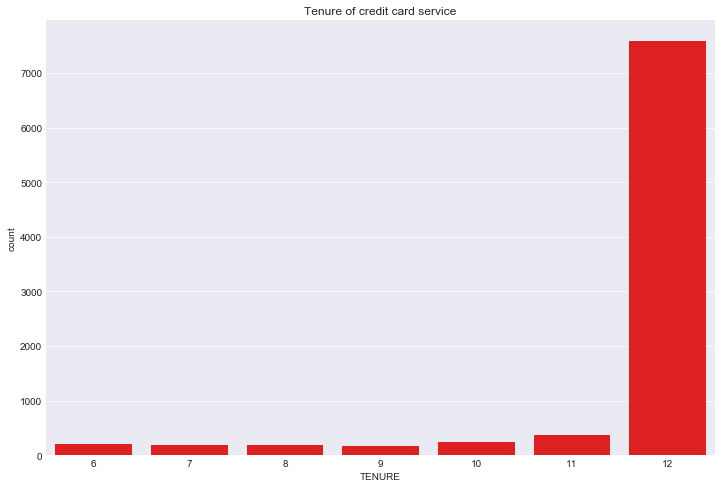

In [28]:
sns.countplot(cc['TENURE'], color='red')
plt.title('Tenure of credit card service')
plt.show()

Most customers have a tenure of 12 months or years as the unit was not stated.

CREDITLIMIT 

Thais is the limit of Credit Card for users.

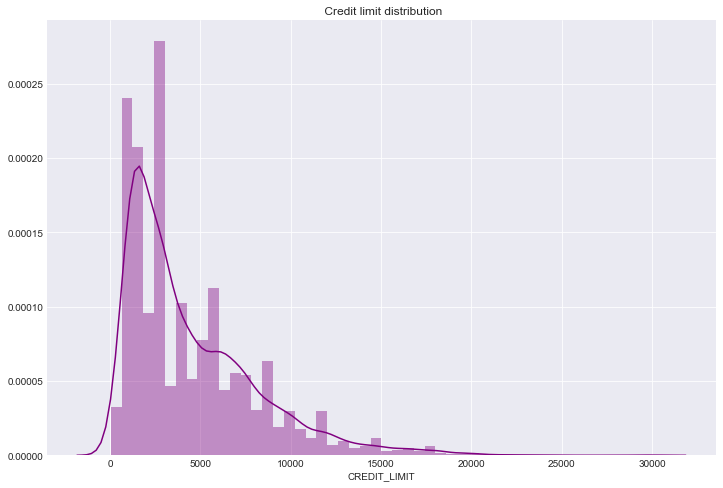

In [29]:
sns.distplot(cc['CREDIT_LIMIT'], color='purple')
plt.title(' Credit limit distribution')
plt.show()


Majority of the customers have credit limit betweeen 0-1000. Some customers have limits as high as 3,000.

Relationships

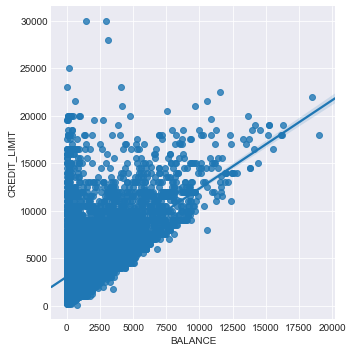

In [30]:
sns.lmplot(x='BALANCE', y='CREDIT_LIMIT',data=cc)

From the plot, it is safe to say that a high balance doesn't necessarily mean that a customer would have a higher credit limit. Customers with lower balance have a high credit card limit.Some customers with a low balance below 5,000 have a credit limit of 3,000.

Text(0.5,1,'Relationship between Balance and tenure')

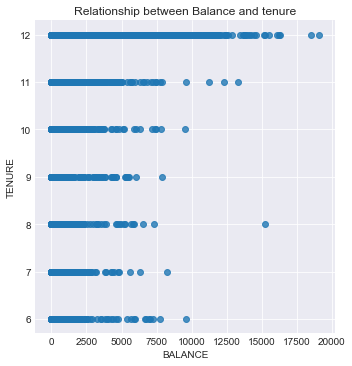

In [31]:
sns.lmplot(x='BALANCE', y='TENURE',data=cc, fit_reg=False)
plt.title('Relationship between Balance and tenure')

# Machine learning model

In [32]:
cc.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [33]:
cc.drop('CUST_ID', inplace=True, axis=1)

Let's reduce the number of features to 2 using Princioal component analysis.

In [34]:
from sklearn.decomposition import PCA

In [36]:
pca=PCA(n_components=2)
pca.fit(cc)
new_data=pca.transform(cc)

Lets check how good our transformation was

In [39]:
ev= pca.explained_variance_ratio_

In [40]:
ev

array([0.47529109, 0.17778772])

In [41]:
pca.components_

array([[ 2.91520886e-01,  8.37060360e-06,  2.92697063e-01,
         2.10847108e-01,  8.18443400e-02,  2.16284190e-01,
         1.29573393e-05,  2.27451326e-05,  8.44725248e-06,
         1.02148816e-05,  4.04619005e-04,  2.34107162e-03,
         6.90109285e-01,  4.87428470e-01,  1.32541190e-01,
         2.30860179e-06,  3.92669268e-05],
       [-3.00679738e-01, -4.25285620e-06,  5.00842233e-01,
         3.80377585e-01,  1.20504679e-01, -2.04398308e-01,
         3.71026793e-05,  2.84330732e-05,  3.02318099e-05,
        -1.93683869e-05, -5.03675263e-04,  3.51702459e-03,
        -4.47352816e-01,  4.70277881e-01, -1.90953255e-01,
         2.57018536e-05,  3.21101997e-06]])

Converting the pca componets to a dataframe

In [42]:
df=pd.DataFrame(new_data, columns=['PC1','PC2'])

In [43]:
df.head()

,PC1,PC2
0,-4326.383956,921.566884
1,4118.916676,-2432.846347
2,1497.907660,-1997.578692
3,1394.548556,-1488.743450
4,-3743.351874,757.342659


To get the number of k for our clusters using the elbow method

In [45]:
from sklearn.cluster import KMeans


In [56]:
ss=[]
K=range(1,10)
for k in K:
    km=KMeans(n_clusters=k)
    data=km.fit(new_data)
    
    ss.append(data.inertia_)
    

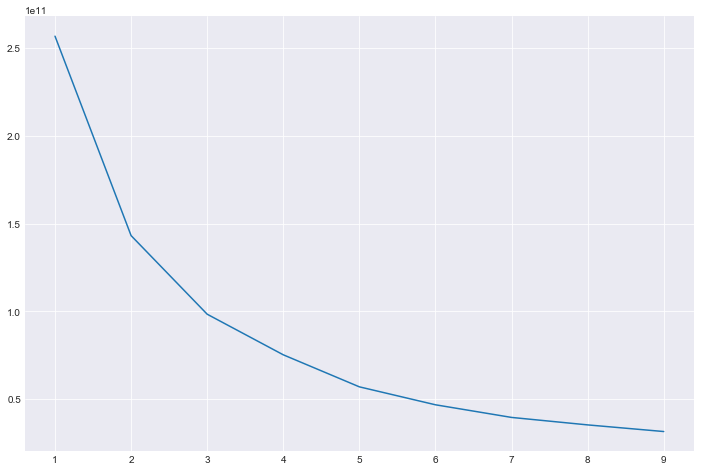

In [57]:
plt.plot(K, ss)

From the elbow method, we can use 3 or 4 for our clusters.Let's make use of the silhoutte method to also determine the number of clusters suited for this analysis to be certain

In [60]:
from sklearn.metrics import silhouette_score
range=[2,3,4,5]
for i in range:
    km=KMeans(n_clusters=i)
    km.fit(new_data)
    labels=km.predict(new_data)
    print(i, silhouette_score(new_data, labels))

2 0.5980170297658037
3 0.5720155554021095
4 0.5027141202135375
5 0.5050168392210683


The silhoutte method has the highest value for two clusters , so we would make use of this.

In [61]:
km=KMeans(n_clusters=2)
km.fit(new_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [64]:
km.cluster_centers_

array([[-1796.39354726,   334.08975814],
       [ 6828.99392482, -1270.04293248]])

To pass the new clusters to the dataframe, we create a new column called cluster

In [62]:
cc['cluster']=km.labels_

In [63]:
cc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


Let's build some visualizations but automate the process by writing a function

In [77]:
def scatter(col1,col2):
     sns.lmplot(x=col1, y=col2, data=cc, hue='cluster')
     plt.title(f'Distribution of clusters based on {col1} and {col2}')
    
        

In [72]:
cc.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'cluster'],
      dtype='object')

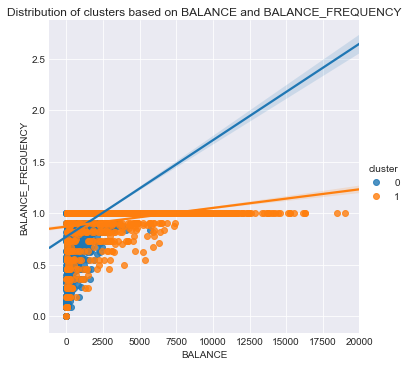

In [78]:
scatter('BALANCE', 'BALANCE_FREQUENCY')

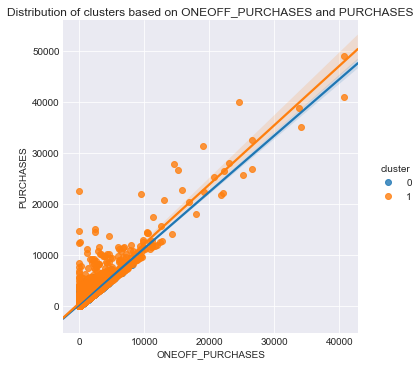

In [81]:
scatter('ONEOFF_PURCHASES','PURCHASES')

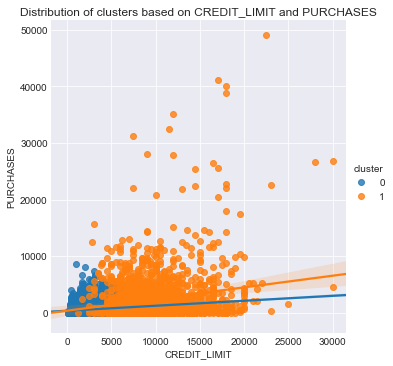

In [82]:
scatter('CREDIT_LIMIT','PURCHASES')

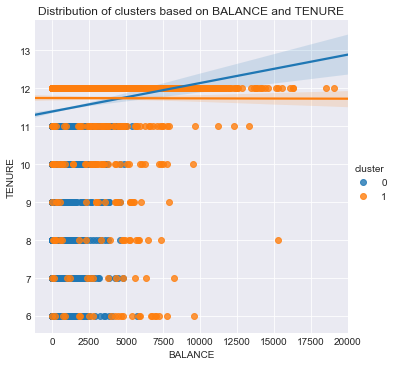

In [83]:
scatter('BALANCE', 'TENURE')

We have succeded in building a clustering model tho help in segmenting customers for marketing strategy